# Machine learning

In [1]:
## Import modules

In [117]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings

%matplotlib inline

Import file(Should put 'r' in front to avoid SyntaxError)

In [170]:
df_train=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\train.csv')
df_test=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\test.csv')

Create 'FamilySize' column

In [171]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1
#Why do I put 1? 'Because Sibsp, Parch does not include the passenger himself. SibSp' refers the number of sibling+spouse the passenger aboarded wih.'SibSp' refers the number of parents and chold the passenger aboarded wih


Create not skewed fare model for correct machine learning

Fill the Fare data with not skewed data

In [172]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
#use of 'lambda' to log the outliers

### Fill null data

In [173]:
df_train['Title']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Title']=df_test['Name'].str.extract('([A-Za-z]+)\.')

In [174]:
df_train['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                         ['Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Other', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr'], inplace=True)
df_test['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [175]:
df_all=pd.concat([df_train, df_test])

In [176]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Mr'), 'Age']=33
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Mrs'), 'Age']=37
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Master'), 'Age']=5
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Miss'), 'Age']=22
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Other'), 'Age']=45

In [177]:
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Mr'), 'Age']=33
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Mrs'), 'Age']=37
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Master'), 'Age']=5
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Miss'), 'Age']=22
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Other'), 'Age']=45

In [178]:
df_train['Embarked'].fillna('S', inplace=True)

### Categorizing 'Age'

Make a new column that categorize age groups by ten years.

In [179]:
def category_age(x):
    return min(int(x / 10), 7)

In [180]:
df_train['Age_2']=df_train['Age'].apply(category_age)

df_test['Age_2']=df_test['Age'].apply(category_age)

Delete 'Age' column since I made the 'Age_2' column

In [181]:
df_train.drop(['Age'], axis=1, inplace=True)
#'axis=1' means deleting the column(세로줄)

In [182]:
df_test.drop(['Age'], axis=1, inplace=True)

### Changing 'Title' into number

In [183]:
df_train['Title']=df_train['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Title']=df_test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

### Changing 'Embarked' into number

In [184]:
df_train['Embarked']=df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked']=df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})


### Changing 'Sex' into number

In [185]:
df_train['Sex']=df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0, 'male':1})

## One-hot encoding on Initial and Embarked

In [186]:
df_train=pd.get_dummies(df_train, columns=['Title'], prefix='Title')
df_test=pd.get_dummies(df_test, columns=['Title'], prefix='Title')

In [187]:
df_train=pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test=pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## Dropping un-needed columns(string column)

In [189]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [190]:
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Import machinelearning module(sklearn. RandomForest)

Import modules

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

Set train object as 'Survived'.


In [192]:
X_train=df_train.drop('Survived', axis=1).values
target_label=df_train['Survived'].values
X_test=df_test.values

Evaluate whether the model is appropriate by spliting train datasets to two sets and learning a model to validate the accuracy.

 test_size=0.3->Use 30% of df_train data set as data to validate=X_vid; Use 70% to test=X_tr

In [193]:
X_tr, X_vid, y_tr, y_vld=train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [194]:
model=RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
prediction=model.predict(X_vid)

In [196]:
(prediction==y_vld).sum()/prediction.shape[0]

0.8283582089552238

Model prediction accuracy=81.3%

## Feature Importance

In [197]:
model.feature_importances_

array([0.09645943, 0.09999323, 0.33667163, 0.09802018, 0.11986031,
       0.01243806, 0.04441235, 0.11922719, 0.03032964, 0.        ,
       0.01321055, 0.01241157, 0.01696586])

In [198]:
X_train=df_train.drop('Survived', axis=1).values

In [199]:
feature_importance=model.feature_importances_
Series_feat_imp=Series(feature_importance, index=df_test.columns)

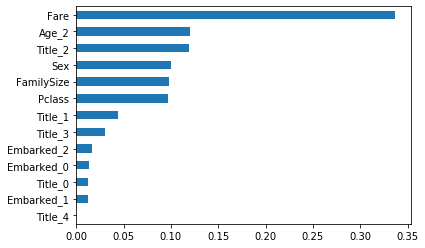

In [200]:
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.show()

'Fare' and 'Age' plays the biggest role in influencing survival rates.

## Prediction on test set

In [214]:
submission=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\submission.csv')

In [215]:
prediction=model.predict(X_test)
submission['Survived']=prediction

In [221]:
submission.to_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\second_submission.csv', index=False)

In [223]:
second_submission=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\second_submission.csv')
second_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Model accuracy= 72%